### wooh things are starting to get fun! :yay: 
Let's do some Linear Regression. 

We'll first just solve the problem, to see how easy it is, then hopefully, I can provide some examples that can give you some intuition and avoid confusions I've seen last year.

If anything is unclear or you found a mistake, please ping me.

In [1]:
#getting a dataset
from sklearn.datasets import fetch_openml # load_boston, fetch_california_housing

# Predicting House Prices 💰🏡💰
### We'll do housing to follow along the lecture
This is a famous Dataset, Ames, before everyone used Boston, which is much simpler and we wouldn't have any cleaning up to do. <br />
It's still there, you can use it with load_boston. 
<br />But we shouldn't because the dataset is nowadays considered racist. <br />
:pikashrug: you can read up on it on sklearn.

### We'll try to predict house prices in Ames (Iowa, USA), with predictor variables area and #bathrooms

In [2]:
#get the dataset, as_frame gives pandas dataframe (see pandas numpy minireference if anything is unclear)
data = fetch_openml(name="house_prices", as_frame=True)
#get the data
ames = data['data']
#get the y target i.e. Price
ames['Price'] = data['target']
#too much data for illustration, keep simple, we only take area, num_baths and price like in the lecture
housing = ames[['LotArea', 'FullBath', 'Price']]

In [3]:
#check that everything is there
housing.head()

,LotArea,FullBath,Price
0,8450.0,2.0,208500.0
1,9600.0,2.0,181500.0
2,11250.0,2.0,223500.0
3,9550.0,1.0,140000.0
4,14260.0,2.0,250000.0


### Let's just solve the problem

In [4]:
#get the linear regression Model
from sklearn.linear_model import LinearRegression
#helper function to split data, this function takes numpy arrays or pandas dataframes
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

#split the target variable, I know it's redundant to have added it earlier, but this is usually the format you'll get it
y = housing.Price
#With two features no need, but if it gets more it's good to have a clear view of them
features = ['LotArea', 'FullBath']
#another way:
#features = housing.columns.drop('Price').to_list() #uncomment to see it's equivalent
X = housing[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#instantiate the model class
model = LinearRegression()
#fit the data
model.fit(X_train, y_train)
#make predictions
test_predictions = model.predict(X_test)

In [6]:
#mean squared error, fun to implement yourself as exercise 
from sklearn.metrics import mean_squared_error as mse
test_error = mse(test_predictions, y_test)
print(f"our mean squared error for the test set is {test_error}")

our mean squared error for the test set is 4851233178.233115


In [7]:
train_error = mse(model.predict(X_train), y_train)
print(f"the error on our training data is: {train_error}")

the error on our training data is: 3898241867.7059927


In [8]:
#mean absolute might be a little more illustrative
from sklearn.metrics import mean_absolute_error as mae
test_error = mae(test_predictions, y_test)
train_error = mae(model.predict(X_train), y_train)
print(f"our mean squared error for the test set is {test_error}")
print(f"the error on our training data is: {train_error}")
print(f"test error over train error is: {test_error/train_error}")

our mean squared error for the test set is 45022.26215144115
the error on our training data is: 42581.45226304965
test error over train error is: 1.0573209639096675


In [9]:
print(f' weights [w1, w2] model found: {model.coef_} and w0: {model.intercept_}')

 weights [w1, w2] model found: [1.46638055e+00 7.46756891e+04] and w0: 47998.805018769955


This is a good sign, no overfitting (simple model), the ratio of test_error/train_error is roughly 1 which means it generalizes really well.
<br />
So this is all there is to applying it in general.
<br />
Now, let's have some more fun,😸  <br />
or do something else.😿

Links to the docs you may want to check out to dive into even further:

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html #remember this useful map!

# EDA Exploratory Data Analysis
It's always best practice to get a feel of your data before you do anything, almost everything is intuitively explained by graphs. <br />
You can also easily spot if your data is linear or non linear w.r.t to  and make use of these facts.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#seaborn makes matplotlib pretty
import seaborn as sns
import pandas as pd

In [11]:
#sets size for plots to 12 x 8 inch per your dpi
sns.set(rc={'figure.figsize':(12,8)})

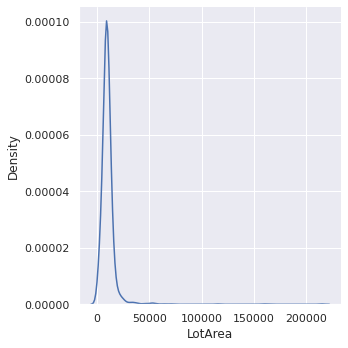

In [12]:
#lets look at the area distribution our predictor variable
sns.displot(data = housing, x = 'LotArea', kind = 'kde')

### ugh evil outliers, they do not only mess with graphs, lets get rid of them

In [13]:
quantile_5 = housing.quantile(q = 0.05, axis=0).LotArea #first 5pc
quantile_95 = housing.quantile(q = 0.95, axis=0).LotArea #first 95pc
#only select ~mean +- 2stds of Area or middle 90%
mask = (housing.LotArea > quantile_5) & (housing.LotArea < quantile_95)

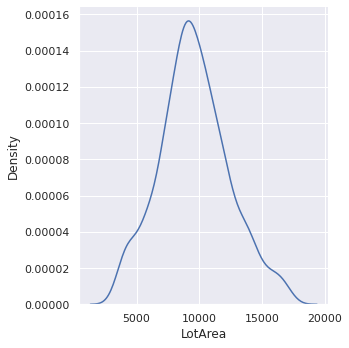

In [14]:
sns.displot(data = housing[mask], x='LotArea', kind = 'kde')

### huh, everything is a Gaussian nowadays, someone should come up with a theorem

Actually there is another reason we use seaborn, it has a plot that lets you almost cheat.

<AxesSubplot:xlabel='LotArea', ylabel='Price'>

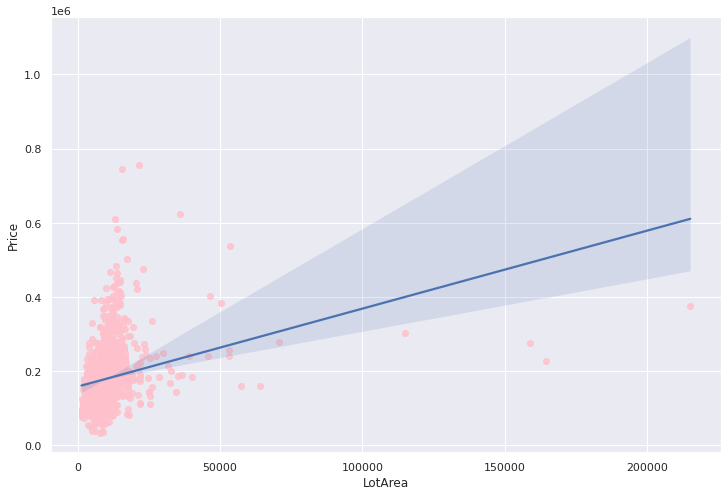

In [15]:
#keep all data when plotting first, so you can find outliers and decide what to do with them
sns.regplot(data = housing, x = 'LotArea', y = 'Price', scatter_kws = {'color': 'pink'})

<AxesSubplot:xlabel='LotArea', ylabel='Price'>

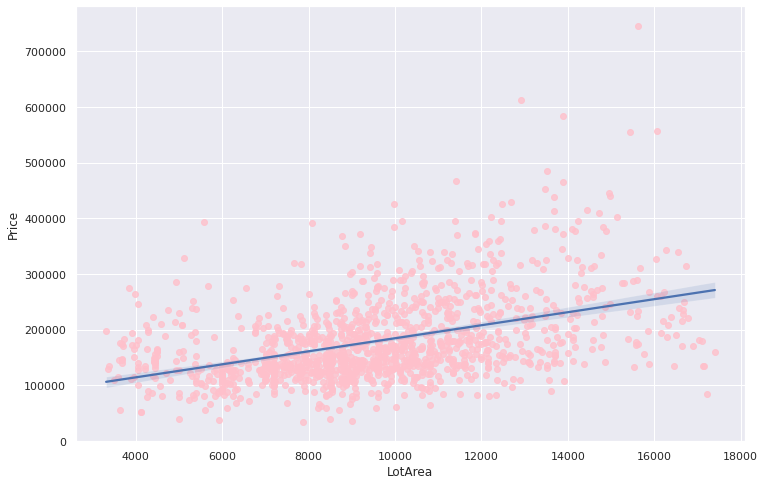

In [16]:
#the shaded area indicates the confidence interval
sns.regplot(data = housing[mask], x = 'LotArea', y = 'Price', scatter_kws = {'color': 'pink'})

You can see that on the plot above there is a lot more uncertainty hence the confidence interval (shaded blue) is going nuts towards the outliers. <br/>
Just a few samples compared to the other points.

In [17]:
#pandas lets you describe your data numerically which is super helpful
housing.describe()

,LotArea,FullBath,Price
count,1460.000000,1460.000000,1460.000000
mean,10516.828082,1.565068,180921.195890
std,9981.264932,0.550916,79442.502883
min,1300.000000,0.000000,34900.000000
25%,7553.500000,1.000000,129975.000000
50%,9478.500000,2.000000,163000.000000
75%,11601.500000,2.000000,214000.000000
max,215245.000000,3.000000,755000.000000


### Closed Form Solution and Augmenting the Matrix for the intercept

There was a bit of confusion last year about the columns of 1s in the Data Matrix as well as the intercept parameter in the LinearRegression predictor.
<br />
I think with this years Illustrations it should be much clearer.
<br />
Let's work through a toy example anyway just to be sure.🧑‍🔧 

### Simple start with defining a line
m = w1 is the slope<br />
and <br />
b = w0 is the intercept or bias, this term often captures the mean value of your data.

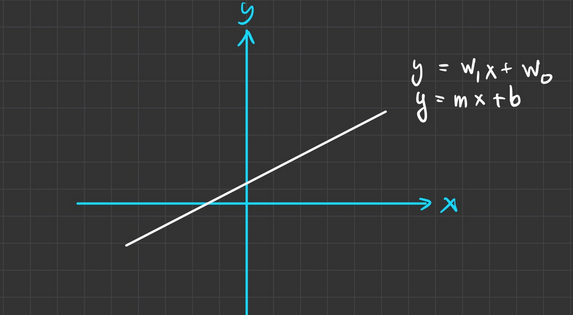

This is a dot product

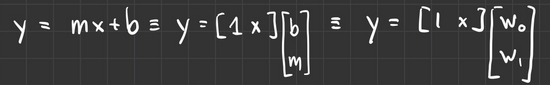


All samples are a dot products. We can combine them into a matrix and weights vector.<br />
Below w_hat and y_hat just mean that they are our estimates of the true ys and true ws.
My y-vector below should have hats.

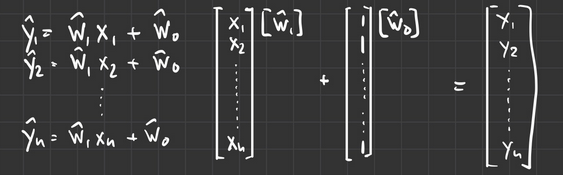

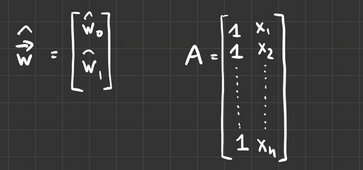 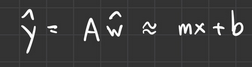

In [18]:
#lets define a line
# y = 2x + 5 Where the weight = 2 and 5 is the intercept
x = np.array([8]) #just random x, change if you like
b = 5
w = np.array([2])
print(f'the data point {x} gives this point on the line {x.dot(w) + b}')

the data point [8] gives this point on the line 21


w and b define a line, b is often also denoted w<sub>0</sub> which will make sense when we look at the augmentation matrix for the closed form solution. 

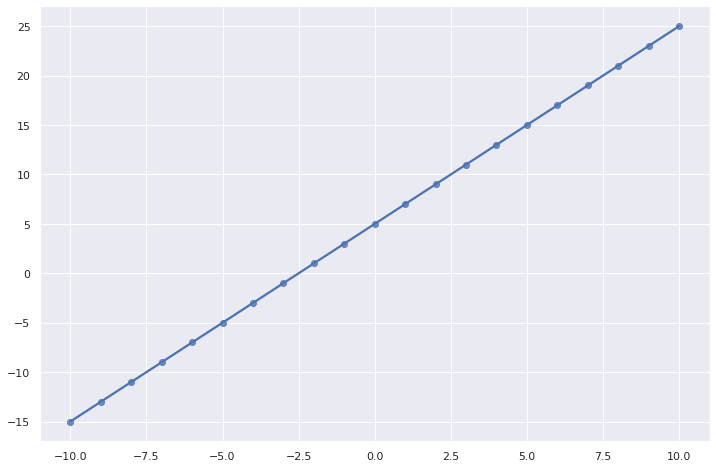

In [19]:
#np.arange gives an array of ints with [start, stop -1, step] step default is 1
x = np.arange(-10, 11, 1)
#makes a columns of 5 in the size/shape of x (see numpy pandas notebook for more)
b = np.ones_like(x) * 5
y = x*w + b
sns.regplot(x = x, y = y)
plt.show()

In [20]:
#makes x into a column vector 
#numpy has weird row vectors don't worry about it, just remember you have to reshape sometimes and sklearn will tell you exactly when and how
x = x.reshape(-1, 1)
b = np.ones_like(x) * 5
#make matrix [x, b]
X = np.concatenate([b, x], axis= 1)
#Xw = y
#y = X @ w #uncomment!

oh no! here is why:


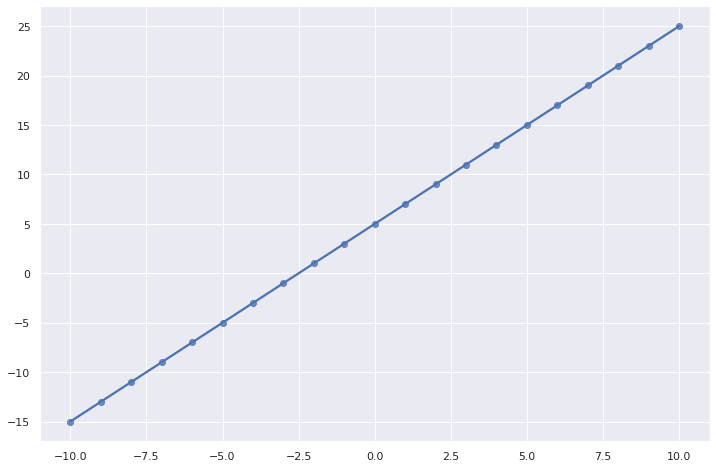

In [21]:
#fix 
w = [1, 2]
y = X @ w
sns.regplot(x = x, y = y)
plt.show()

### success same line!

In [22]:
#lets make a plane
#y = w1x1 + w2x2 + b i.e. y = 2x1 + 2x2 + 5
x = np.array([1, 2])
#intercept
b = 5 
w = np.array([2, 2])

print(f'this is y = x*w + b = {x.dot(w) + b}')

this is y = x*w + b = 11


In [23]:
#augment x with one
xhat = np.append(x, 1) 
#augment w with intercept
what = np.append(w, b) 

print(f'xhat: {xhat}, \nwhat: {what}')
print(f'xhat*what = {xhat.dot(what)}')

xhat: [1 2 1], 
what: [2 2 5]
xhat*what = 11


In [24]:
#X are our samples, lets make random ones
#get a random matrix of 3 training examples 
X = np.random.randint(low = 1, high = 10, size = (3,2)) 
print(f'X: \n {X}')

X: 
 [[9 8]
 [9 5]
 [7 8]]


In [25]:
b = np.ones((3, ))*5 #intercept vector

print(f'b: {b}')
print(f' Xw + b = {(X@w + b)}')

b: [5. 5. 5.]
 Xw + b = [39. 33. 35.]


In [26]:
#make augmented X
Xhat = np.zeros((3,3))
Xhat[:, :2] = X
Xhat[:, 2] = np.ones(3) #add a column of 1's, i.e. 1 to each little x

print(f'Xhat: \n {Xhat}')
print(f'Xhat*what = {(Xhat@what)} \n')

Xhat: 
 [[9. 8. 1.]
 [9. 5. 1.]
 [7. 8. 1.]]
Xhat*what = [39. 33. 35.] 



### fit_intercept, the mean and the bias term
you can set fit_intercept = False if the constant term is included in your data. <br/> you'll then find it as another parameter to be learned.

In [27]:
#save solution for linear regression
y = Xhat@what
reg = LinearRegression()
reg.fit(X, y)
print(f'regression coefficients: {reg.coef_} \n ')
print(f'but what: {what} \n ')
print(f'hiding here: {reg.intercept_} \n ')
reg = LinearRegression(fit_intercept = False)
reg.fit(Xhat, y)
print(f'regression coefficients with augmented Matrix: {reg.coef_} and fit_intercept = False')

regression coefficients: [2. 2.] 
 
but what: [2 2 5] 
 
hiding here: 5.000000000000014 
 
regression coefficients with augmented Matrix: [2. 2. 5.] and fit_intercept = False


### Centered Data, mean and bias
The bias is not always meaningful, but if you center your data, you can think about it as capturing the mean. <br/>
I.e. what's your best guess if you don't know anything about size and bathrooms?
We're going to center with StandardScaler, check it out, this is a function you'll use a lot and there are a few more options than just centering. <br />
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br />
There also are other Scalers in preprocessing that are going to be useful to check out.

In [28]:
from sklearn.preprocessing import StandardScaler
#just center no need to standardize
scaler = StandardScaler(with_std = False)
Xs= scaler.fit_transform(X_train)

In [29]:
reg = LinearRegression()
reg.fit(Xs, y_train)
print(f'coefs {reg.coef_}, intercept {reg.intercept_} and the mean {y_train.mean()}' )

coefs [1.46638055e+00 7.46756891e+04], intercept 181441.5419520548 and the mean 181441.5419520548


In [30]:
import numpy as np
A = np.concatenate([Xs, np.ones((Xs.shape[0], 1))], axis=1)
#numpy python quicky 1dArray[:] everything 1dArray[:5] first five elements
# 2dArray[:, :] everything 2dArray[0, :] first row all cols, 
#2dArray[:5, :] first five rows all columns same in higher dims
print(f'first 5 rows of A:\n{A[:5, :]} \n')
w = np.linalg.inv((A.T @ A)) @ A.T @ y_train
print(f'Closed form Solution:\n{w}')
print(f'Model coefs:\n{reg.coef_}, intercept {reg.intercept_}' )

first 5 rows of A:
[[-2.28964212e+03 -5.77054795e-01  1.00000000e+00]
 [-2.85264212e+03  4.22945205e-01  1.00000000e+00]
 [-1.91264212e+03 -5.77054795e-01  1.00000000e+00]
 [-3.48964212e+03 -5.77054795e-01  1.00000000e+00]
 [-5.68964212e+03  4.22945205e-01  1.00000000e+00]] 

Closed form Solution:
[1.46638055e+00 7.46756891e+04 1.81441542e+05]
Model coefs:
[1.46638055e+00 7.46756891e+04], intercept 181441.5419520548


# Error Function

Let's reproduce the graphs from the lecture and understand the MSE and RSS (Residual Sum of Squares) a bit better.

In [31]:
#for making 3d plots
from mpl_toolkits.mplot3d import axes3d
#you'll learn about
from sklearn.metrics import mean_squared_error

In [32]:
# Create grid coordinates for plotting
#reg is the model we fit on scaled data, this will make the plot nicer, we also only use sqm because plotting in 4d is hard
reg = LinearRegression()
#scaler again
scaler = StandardScaler()
scaled_sqm = scaler.fit_transform(X_train.LotArea.to_numpy().reshape(-1,1))
reg.fit(scaled_sqm, y_train)
w0 = np.linspace(reg.intercept_ - 2, reg.intercept_ + 2, 100) #w_0
w1 = np.linspace(reg.coef_ - 3, reg.coef_ + 3, 100) #w_1
#meshgrid just makes a cartesian plane with w0 and w1 as coordinates
xx, yy = np.meshgrid(w0, w1, indexing='xy')
#l'axis de Z
Z = np.zeros((w0.size, w1.size))


# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y_train.to_numpy() - (xx[i,j]+scaled_sqm.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'w_0, w_1 for minimized RSS'
min_rss = np.sum((reg.intercept_ + reg.coef_[0] * scaled_sqm - y_train.to_numpy().reshape(-1,1))**2)/1000
min_rss

6472911894.416129

In [33]:
def plot_mse_contour(reg, min_RSS, Z):
    fig = plt.figure(figsize=(12,12))
    fig.suptitle('RSS - Regression coefficients', fontsize=20)

    ax1 = fig.add_subplot(111)

    # Left plot
    CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=5)
    ax1.scatter(reg.intercept_, reg.coef_[0], c='r', label=min_RSS)
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
    ax1.set_xlabel('w_0', fontsize=17)
    ax1.set_ylabel('w_1', fontsize=17)
    plt.savefig('topdown.png')
    plt.show()

In [34]:
def plot_3dMSE():
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111, projection='3d')
    #ax.set_axis_off()

    ax.grid()
    ax.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
    ax.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
                alpha=0.4, levels=5)
    ax.scatter3D(reg.intercept_, reg.coef_[0], min_rss, c='r', label=min_RSS)
    ax.set_zlabel('RSS')
    ax.set_zlim(Z.min(),Z.max())


    ax.set_xlabel('w_0', fontsize=17)
    ax.set_ylabel('w_1', fontsize=17)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.legend()
    plt.savefig('RSS3D.png')
    plt.show()

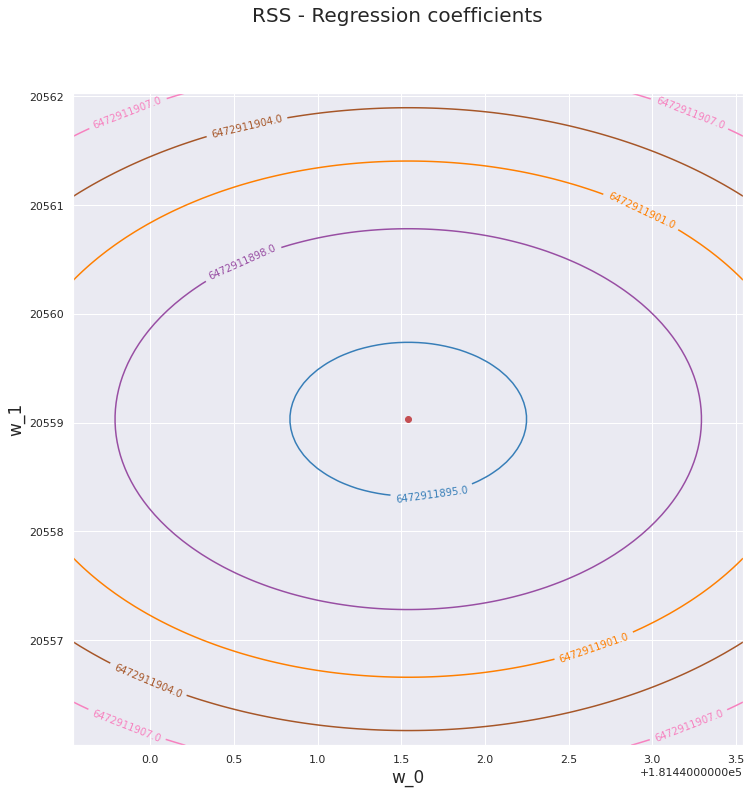

In [35]:
plot_mse_contour(reg, min_RSS, Z)

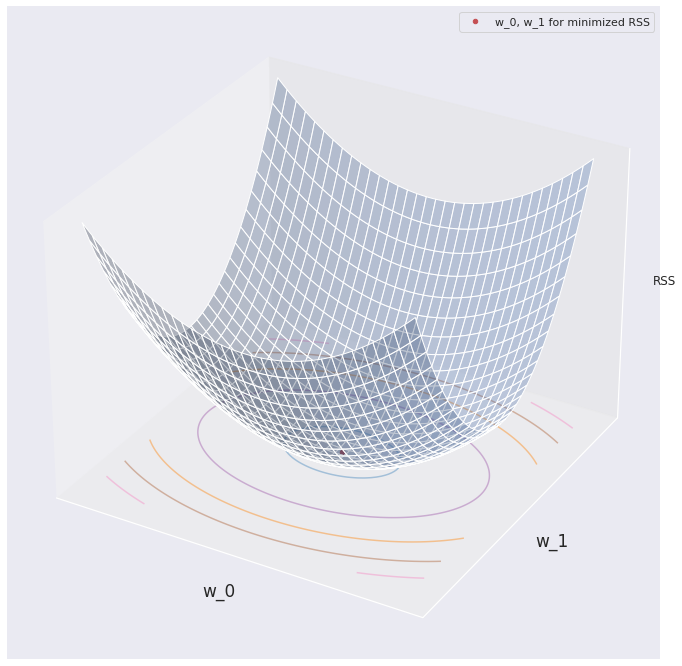

In [36]:
plot_3dMSE()